# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Dependencies
import json
import requests
import random
from citipy import citipy

import seaborn as sns

# Import Open Weather Map API key.
from api_keys import api_key
# Import API key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


In [74]:
!pip install citipy

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Generate Cities List

In [99]:

lat_values = np.arange(-90, 90, 0.01)
lng_values = np.arange(-180, 180, 0.01)

In [104]:
# Create an empty data frame to city and weather data
column_names = ('city_name', 'country_code', 'Latitude', 'Longitude','Temp (F)',
            'Humidity (%)','Cloudiness (%)','Wind Speed (mph)')
cities_df = pd.DataFrame(columns = column_names)
cities_df

,city_name,country_code,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


In [105]:


target_url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'

count = 0

# Loop through and grab the Temp, Humidity, Cloudiness and Wind Speed using OpenWeatherMapAPI
    
while len(cities_df) <500:
  
    rand_lat = random.choice(lat_values)
    rand_lng = random.choice(lng_values)
  
    city = citipy.nearest_city(rand_lat, rand_lng)
    city_name = city.city_name
    country_code = city.country_code
    
    
    url = target_url + city_name + ',' + country_code + '&units=' + units + '&APPID=' + api_key
    weather_response = requests.get(url)
    weather_json = weather_response.json()
    if weather_json["cod"] == 200:
        print('City: %s. %s' % (weather_json['name'], url))
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        temperature = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        windspeed = weather_json["wind"]["speed"]
       
        if city_name not in cities_df.city_name.values:
            print('Status code: %s. DF length is now: %d' % (str(weather_json["cod"]), len(cities_df)+1))
            
            cities_df.set_value(count, "city_name", city_name)
            cities_df.set_value(count, "country_code", country_code)
            cities_df.set_value(count, "Latitude", latitude)
            cities_df.set_value(count, "Longitude", longitude)
            cities_df.set_value(count, "Humidity (%)", humidity)
            cities_df.set_value(count, "Cloudiness (%)", cloudiness)
            cities_df.set_value(count, "Wind Speed (mph)", windspeed)
            cities_df.set_value(count, "Temp (F)", temperature)
            cities_df.set_value(count, "Humidity (%)", humidity)
            cities_df.set_value(count, "Cloudiness (%)", cloudiness)
            cities_df.set_value(count, "Wind Speed (mph)", windspeed)

            count += 1
        else:
            pass
    else:
        pass
    
cities_df.head()

City: Salalah. http://api.openweathermap.org/data/2.5/weather?q=salalah,om&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 1
City: Klaksvik. http://api.openweathermap.org/data/2.5/weather?q=klaksvik,fo&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 2


/Users/SLayachi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/SLayachi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/SLayachi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/SLayachi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/SLayachi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or 

City: Zanjan. http://api.openweathermap.org/data/2.5/weather?q=zanjan,ir&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 3
City: Norman Wells. http://api.openweathermap.org/data/2.5/weather?q=norman wells,ca&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 4
City: Florianopolis. http://api.openweathermap.org/data/2.5/weather?q=florianopolis,br&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 5
City: Namibe. http://api.openweathermap.org/data/2.5/weather?q=namibe,ao&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 6
City: Hasaki. http://api.openweathermap.org/data/2.5/weather?q=hasaki,jp&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 7
City: Khatanga. http://api.openweathermap.org/data/2.5/weather?q=khatanga,ru&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. 

City: Iqaluit. http://api.openweathermap.org/data/2.5/weather?q=iqaluit,ca&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Chokurdakh. http://api.openweathermap.org/data/2.5/weather?q=chokurdakh,ru&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 48
City: Pasinler. http://api.openweathermap.org/data/2.5/weather?q=pasinler,tr&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 49
City: Ouegoa. http://api.openweathermap.org/data/2.5/weather?q=ouegoa,nc&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 50
City: Venado Tuerto. http://api.openweathermap.org/data/2.5/weather?q=venado tuerto,ar&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 51
City: Mount Isa. http://api.openweathermap.org/data/2.5/weather?q=mount isa,au&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 52
City: Okh

City: Tuatapere. http://api.openweathermap.org/data/2.5/weather?q=tuatapere,nz&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Te Anau. http://api.openweathermap.org/data/2.5/weather?q=te anau,nz&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: East London. http://api.openweathermap.org/data/2.5/weather?q=east london,za&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Tasiilaq. http://api.openweathermap.org/data/2.5/weather?q=tasiilaq,gl&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 86
City: Zhuhai. http://api.openweathermap.org/data/2.5/weather?q=zhuhai,cn&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 87
City: Sitka. http://api.openweathermap.org/data/2.5/weather?q=sitka,us&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 88
City: Zaterechnyy. http://api.openweathermap.org/data/2.5/weather?q=zaterechnyy,ru&units=imperial&APP

City: Soyo. http://api.openweathermap.org/data/2.5/weather?q=soyo,ao&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 119
City: Ales. http://api.openweathermap.org/data/2.5/weather?q=ales,fr&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 120
City: Upernavik. http://api.openweathermap.org/data/2.5/weather?q=upernavik,gl&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 121
City: Port Elizabeth. http://api.openweathermap.org/data/2.5/weather?q=port elizabeth,za&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: College. http://api.openweathermap.org/data/2.5/weather?q=college,us&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 122
City: Kandrian. http://api.openweathermap.org/data/2.5/weather?q=kandrian,pg&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 123
City: Ushuaia. htt

City: New Norfolk. http://api.openweathermap.org/data/2.5/weather?q=new norfolk,au&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 145
City: Punta Arenas. http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Sorland. http://api.openweathermap.org/data/2.5/weather?q=sorland,no&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 146
City: Hilo. http://api.openweathermap.org/data/2.5/weather?q=hilo,us&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Albany. http://api.openweathermap.org/data/2.5/weather?q=albany,us&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Muros. http://api.openweathermap.org/data/2.5/weather?q=muros,es&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 147
City: Carnarvon. http://api.openweathermap.org/data/2.5/weather?q=carnarvon,au&units=imperial&APPID=

City: Carupano. http://api.openweathermap.org/data/2.5/weather?q=carupano,ve&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 171
City: Faanui. http://api.openweathermap.org/data/2.5/weather?q=faanui,pf&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 172
City: Upernavik. http://api.openweathermap.org/data/2.5/weather?q=upernavik,gl&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Jining. http://api.openweathermap.org/data/2.5/weather?q=jining,cn&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 173
City: Albany. http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Arraial do Cabo. http://api.openweathermap.org/data/2.5/weather?q=arraial do cabo,br&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&

City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Grindavik. http://api.openweathermap.org/data/2.5/weather?q=grindavik,is&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 195
City: Pevek. http://api.openweathermap.org/data/2.5/weather?q=pevek,ru&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Atuona. http://api.openweathermap.org/data/2.5/weather?q=atuona,pf&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Shaunavon. http://api.openweathermap.org/data/2.5/weather?q=shaunavon,ca&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 196
City: Thompson. http://api.openweathermap.org/data/2.5/weather?q=thompson,ca&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Geraldt

City: Lagoa. http://api.openweathermap.org/data/2.5/weather?q=lagoa,pt&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 221
City: Busselton. http://api.openweathermap.org/data/2.5/weather?q=busselton,au&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Kingaroy. http://api.openweathermap.org/data/2.5/weather?q=kingaroy,au&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 222
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Barrow. http://api.openweathermap.org/data/2.5/weather?q=barrow,us&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Umm Lajj. http://api.openweathermap.org/data/2.5/weather?q=umm lajj,sa&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 223
City: Yellowknife. http://api.openweathermap.org/data/2.5/weather?q=yellowknife,ca&units=imperial&APPID=

City: Toccoa. http://api.openweathermap.org/data/2.5/weather?q=toccoa,us&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 247
City: Norman Wells. http://api.openweathermap.org/data/2.5/weather?q=norman wells,ca&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Tulum. http://api.openweathermap.org/data/2.5/weather?q=tulum,mx&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 248
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Bredasdorp. http://api.openweathermap.org/data/2.5/weather?q=bredasdorp,za&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Bagakay. http://api.openweathermap.org/data/2.5/weather?q=bagakay,ph&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 249
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=

City: Ahipara. http://api.openweathermap.org/data/2.5/weather?q=ahipara,nz&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 264
City: New Norfolk. http://api.openweathermap.org/data/2.5/weather?q=new norfolk,au&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Balkhash. http://api.openweathermap.org/data/2.5/weather?q=balkhash,kz&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 265
City: Cap-aux-Meules. http://api.openweathermap.org/data/2.5/weather?q=cap-aux-meules,ca&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 266
City: San Andres. http://api.openweathermap.org/data/2.5/weather?q=san andres,co&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 267
City: Hithadhoo. http://api.openweathermap.org/data/2.5/weather?q=hithadhoo,mv&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Klaksvik. http://api.openw

City: Nanortalik. http://api.openweathermap.org/data/2.5/weather?q=nanortalik,gl&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Yellowknife. http://api.openweathermap.org/data/2.5/weather?q=yellowknife,ca&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Hermanus. http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Albany. http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Albany. http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Severo-Kurilsk. http://api.openweathermap.org/data/2.5/weather?q=severo-kurilsk,ru&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 286
City: Hilo. http://api.openweathermap.org/data/2.5/weather?q=hilo,us&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Torbay. http://api.openweatherm

City: Dalwangan. http://api.openweathermap.org/data/2.5/weather?q=dalwangan,ph&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 299
City: Busselton. http://api.openweathermap.org/data/2.5/weather?q=busselton,au&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Kodiak. http://api.openweathermap.org/data/2.5/weather?q=kodiak,us&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Klaksvik. http://api.openweathermap.org/data/2.5/weather?q=klaksvik,fo&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Qasigiannguit. http://api.openweathermap.org/data/2.5/weather?q=qasigiannguit,gl&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 300
City: Kabarnet. http://api.openweathermap.org/data/2.5/weather?q=kabarnet,ke&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28

City: Naryan-Mar. http://api.openweathermap.org/data/2.5/weather?q=naryan-mar,ru&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 321
City: Tarabuco. http://api.openweathermap.org/data/2.5/weather?q=tarabuco,bo&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 322
City: Albany. http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Alofi. http://api.openweathermap.org/data/2.5/weather?q=alofi,nu&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 323
City: Punta Arenas. http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Vardo. http://api.openweathermap.org/data/2.5/weather?q=vardo,no&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Misratah. http://api.openweathermap.org/data/2.5/weather?q=misratah,ly&units=imperial&APPID=

City: Kigoma. http://api.openweathermap.org/data/2.5/weather?q=kigoma,tz&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 347
City: Hobart. http://api.openweathermap.org/data/2.5/weather?q=hobart,au&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Kodiak. http://api.openweathermap.org/data/2.5/weather?q=kodiak,us&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Jamestown. http://api.openweathermap.org/data/2.5/weather?q=jamestown,sh&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Vaini. http://api.openweathermap.org/data/2.5/weather?q=vaini,to&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Albany. http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Tiksi. http://api.openweathermap.org/data/2.5/weather?q=tiksi,ru&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Cape Town. http://api.openweathermap.org/data/2.5/weather?q=cap

City: Aksarka. http://api.openweathermap.org/data/2.5/weather?q=aksarka,ru&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Castro. http://api.openweathermap.org/data/2.5/weather?q=castro,cl&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Mahebourg. http://api.openweathermap.org/data/2.5/weather?q=mahebourg,mu&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Algeciras. http://api.openweathermap.org/data/2.5/weather?q=algeciras,co&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 362
City: Busselton. http://api.openweathermap.org/data/2.5/weather?q=busselton,au&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Jamestown. http://api.openweathermap.org/data/2.5/weather?q=jamestown,sh&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Quatre Cocos. http://api.openweathermap.org/data/2.5/weather?q=quatre cocos,mu&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Kodiak. http://api.openweat

City: Ambagarh Chauki. http://api.openweathermap.org/data/2.5/weather?q=ambagarh chauki,in&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 379
City: Kodiak. http://api.openweathermap.org/data/2.5/weather?q=kodiak,us&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Garden City. http://api.openweathermap.org/data/2.5/weather?q=garden city,us&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 380
City: Kodiak. http://api.openweathermap.org/data/2.5/weather?q=kodiak,us&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Mucurapo. http://api.openweathermap.org/data/2.5/weather?q=mucurapo,tt&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 381
City: Okhotsk. http://api.openweathermap.org/data/2.5/weather?q=okhotsk,ru&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Kapaa. http://api.openweathermap.org/data/2.5/weather?q=kapaa,us&units=imperia

City: Talakan. http://api.openweathermap.org/data/2.5/weather?q=talakan,ru&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 397
City: Los Llanos de Aridane. http://api.openweathermap.org/data/2.5/weather?q=los llanos de aridane,es&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Punta Arenas. http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Cidreira. http://api.openweathermap.org/data/2.5/weather?q=cidreira,br&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Bloomingdale. http://api.openweathermap.org/data/2.5/weather?q=bloomingdale,us&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status 

City: Qinhuangdao. http://api.openweathermap.org/data/2.5/weather?q=qinhuangdao,cn&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 414
City: Isangel. http://api.openweathermap.org/data/2.5/weather?q=isangel,vu&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Busselton. http://api.openweathermap.org/data/2.5/weather?q=busselton,au&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Mangai. http://api.openweathermap.org/data/2.5/weather?q=mangai,cd&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 415
City: Bima. http://api.openweathermap.org/data/2.5/weather?q=bima,id&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 416
City: Kavieng. http://api.openweathermap.org/data/2.5/weather?q=kavieng,pg&units=imperial&APPID=e7f10d

City: Komsomolskiy. http://api.openweathermap.org/data/2.5/weather?q=komsomolskiy,ru&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 437
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Albany. http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Punta Arenas. http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Yellowknife. http://api.openweathermap.org/data/2.5/weather?q=yellowknife,ca&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Bluff. http://api.openweathermap.org/data/2.5/weather?q=bluff,nz&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Poya. http://api.openweathermap.org/data/2.5/weather?q=poya,nc&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 438
C

City: New Richmond. http://api.openweathermap.org/data/2.5/weather?q=new richmond,ca&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 458
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Saint George. http://api.openweathermap.org/data/2.5/weather?q=saint george,bm&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Guider. http://api.openweathermap.org/data/2.5/weather?q=guider,cm&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 459
City: Puerto Ayora. http://api.openweathermap.org/data/2.5/weather?q=puerto ayora,ec&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Saskylakh. http://api.openweathermap.org/data/2.5/weather?q=saskylakh,ru&units=imperial&APPID=e7f10d5a16922e4cea

City: Vila Franca do Campo. http://api.openweathermap.org/data/2.5/weather?q=vila franca do campo,pt&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 474
City: Warangal. http://api.openweathermap.org/data/2.5/weather?q=warangal,in&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 475
City: Arraial do Cabo. http://api.openweathermap.org/data/2.5/weather?q=arraial do cabo,br&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Coxim. http://api.openweathermap.org/data/2.5/weather?q=coxim,br&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 476
City: Saskylakh. http://api.openweathermap.org/data/2.5/weather?q=saskylakh,ru&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Kapaa. http://api.openweathermap.org/data/2.5/weather?q=kapaa,us&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Ramanathapuram. http://api.openweathermap.org/data/2.5/weath

City: Mildura. http://api.openweathermap.org/data/2.5/weather?q=mildura,au&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 489
City: New Norfolk. http://api.openweathermap.org/data/2.5/weather?q=new norfolk,au&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Torbay. http://api.openweathermap.org/data/2.5/weather?q=torbay,ca&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Ranong. http://api.openweathermap.org/data/2.5/weather?q=ranong,th&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
Status code: 200. DF length is now: 490
City: Port Alfred. http://api.openweathermap.org/data/2.5/weather?q=port alfred,za&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Fairbanks. http://api.openweathermap.org/data/2.5/weather?q=fairbanks,us&units=imperial&APPID=e7f10d5a16922e4cea2f8de06a28314a
City: Punta Arenas. http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&APPID=e7f10d5a16922e4cea2f8de0

,city_name,country_code,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,salalah,om,17.01,54.1,71.6,43,0,6.93
1,klaksvik,fo,62.23,-6.59,23,79,0,9.78
2,zanjan,ir,36.67,48.48,35.6,74,40,11.41
3,norman wells,ca,65.28,-126.83,-2.21,64,75,18.34
4,florianopolis,br,-27.6,-48.55,84.2,89,0,9.17


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [106]:
len(cities_df)

500

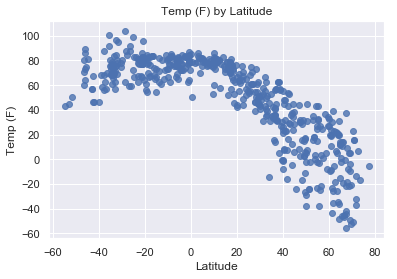

In [114]:

# Build a scatter plot City Latitude vs. Temperature
sns.set_style('ticks')
sns.set(style="darkgrid")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Temp (F)", data=cities_df, fit_reg=False).set_title('Temp (F) by Latitude')

# Save the figure
plt.savefig("graphs/lat_v_temp.png")

# Show plot
plt.show()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

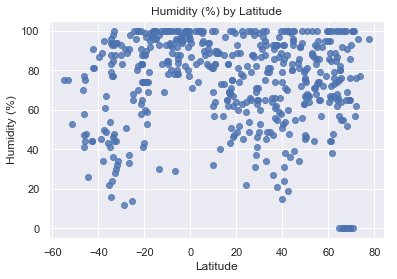

In [116]:

# Build a scatter plot City Latitude vs. Humidity
sns.set_style('ticks')
sns.set(style="darkgrid")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Humidity (%)", data=cities_df, fit_reg=False).set_title('Humidity (%) by Latitude')

# Save the figure
plt.savefig("graphs/lat_v_humidity.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

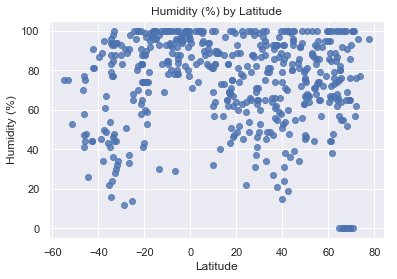

In [117]:
# Build a scatter plot City Latitude vs. Humidity
sns.set_style('ticks')
sns.set(style="darkgrid")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Humidity (%)", data=cities_df, fit_reg=False).set_title('Humidity (%) by Latitude')

# Save the figure
plt.savefig("graphs/lat_v_humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

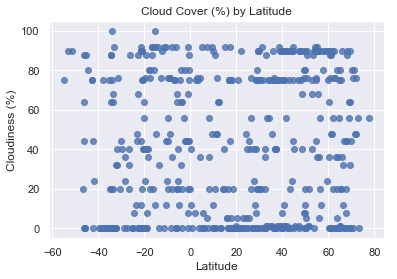

In [119]:
# Build a scatter plot City Latitude vs. Cloudiness
sns.set_style('ticks')
sns.set(style="darkgrid")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Cloudiness (%)", data=cities_df, fit_reg=False).set_title('Cloud Cover (%) by Latitude')

# Save the figure
plt.savefig("graphs/lat_v_cloud.png")

# Show plot
plt.show()

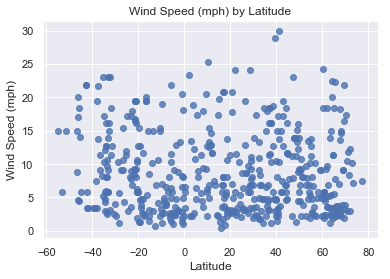

In [120]:
# Build a scatter plot City Latitude vs. Wind Speed
sns.set_style('ticks')
sns.set(style="darkgrid")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Wind Speed (mph)", data=cities_df, fit_reg=False).set_title('Wind Speed (mph) by Latitude')

# Save the figure
plt.savefig("graphs/lat_v_wind.png")

# Show plot
plt.show()